In [85]:
pip install neupy

#2.2

In [86]:
import numpy as np
import math
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import random
import random
import numpy as np
import pandas as pd
import copy
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
from neupy import algorithms
from neupy.layers import *
arr = []
arr1 = []

In [87]:
def f1(x1,x2):
  y=(math.sin(2*x1+2)*math.cos(.5*x2)+.5)
  return y


In [88]:
x1 = []
x2 = []
f=[]
for i in range(0,21):
  x1.append(random.uniform(0, 360))
  x2.append(random.uniform(0,360))
for i in range(0,21):
  f .append(f1(x1[i],x2[i]))


In [89]:
testx1=[]
testx2=[]
testf=[]
trainx1=[]
trainx2=[]
trainf=[]
for i in range(0,11):
  index=random.randint(0,20)
  testx1.append(x1[index])
  testx2.append(x2[index])
  testf.append(f[index])
  
for i in range(0,10):
  index=random.randint(0,20)
  trainx1.append(x1[index])
  trainx2.append(x2[index])
  trainf.append(f[index])

df_test=pd.DataFrame({'testx1':testx1,'testx2':testx2,'testf':testf})
df_train=pd.DataFrame({'trainx1':trainx1,'trainx2':trainx2,'trainf':trainf})
print(df_test)
print(df_train)



        testx1      testx2     testf
0   135.815132  157.053853  0.806656
1   278.021371  333.964183  1.314446
2     5.644147   75.370977  1.160769
3   137.704246  313.229046  1.226144
4   255.336817  114.960434  0.166084
5   201.539265  111.612764  0.636947
6   309.508761  333.369669  1.337153
7   123.232243  358.845415  0.758214
8     5.644147   75.370977  1.160769
9   278.021371  333.964183  1.314446
10  317.502624  330.146404  0.406382
      trainx1     trainx2    trainf
0  171.000707   68.417288  1.439754
1  215.897893   63.812832  0.723360
2  148.298944  262.210074  0.402711
3  258.547894  250.323043 -0.086490
4  215.897893   63.812832  0.723360
5  123.232243  358.845415  0.758214
6  201.813523  171.823062  0.664072
7  218.080209    1.661982 -0.171308
8  215.897893   63.812832  0.723360
9  218.080209    1.661982 -0.171308


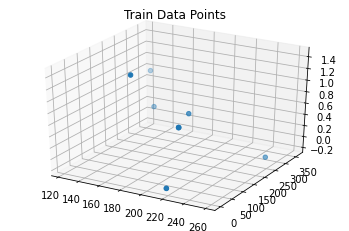

In [90]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Train Data Points')
ax.scatter3D(trainx1,trainx2,trainf,cmap='Greens')

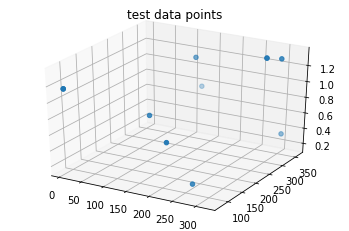

In [91]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('test data points')
ax.scatter3D(testx1,testx2,testf,cmap='Greens')


# 2.3



In [92]:

tf.disable_v2_behavior()

#m#nist = tf.keras.datasets.mnist
#(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

learning_rate = 0.01
training_epochs = 10
batch_size = 32
display_step = 1

n_hidden_1 = 64
n_hidden_2 = 32
n_hidden_3 = 16
n_hidden_4 = 8
n_hidden_5 = 4
n_hidden_6 = 2
n_input    = 2
n_output   = 1

X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])

W1 = tf.Variable(tf.random_uniform([n_input, n_hidden_1],    -1.0, 1.0)) #layer1
W2 = tf.Variable(tf.random_uniform([n_hidden_1, n_hidden_2], -1.0, 1.0))#layer2
W3 = tf.Variable(tf.random_uniform([n_hidden_2, n_hidden_3], -1.0, 1.0))#layer3
W4 = tf.Variable(tf.random_uniform([n_hidden_3, n_hidden_4], -1.0, 1.0))#layer4
W5 = tf.Variable(tf.random_uniform([n_hidden_4, n_hidden_5], -1.0, 1.0))
W6 = tf.Variable(tf.random_uniform([n_hidden_5, n_hidden_6], -1.0, 1.0))
W7 = tf.Variable(tf.random_uniform([n_hidden_6, n_output],    -1.0, 1.0))


# Bias
b1 = tf.Variable(tf.zeros([n_hidden_1]))
b2 = tf.Variable(tf.zeros([n_hidden_2]))
b3 = tf.Variable(tf.zeros([n_hidden_3]))
b4 = tf.Variable(tf.zeros([n_hidden_4]))
b5 = tf.Variable(tf.zeros([n_hidden_5]))
b6 = tf.Variable(tf.zeros([n_hidden_6]))
b7 = tf.Variable(tf.zeros([n_hidden_6]))


def multilayer_perceptron(x):
    l0 = x
    l1 = tf.nn.sigmoid(tf.matmul(l0, W1) + b1)
    l2 = tf.nn.sigmoid(tf.matmul(l1, W2) + b2)
    l3 = tf.nn.sigmoid(tf.matmul(l2, W3) + b3)
    l4 = tf.nn.sigmoid(tf.matmul(l3, W4) + b4)
    l5 = tf.nn.sigmoid(tf.matmul(l4, W5) + b5)
    l6 = tf.nn.sigmoid(tf.matmul(l5, W6) + b6)
    l7 = tf.matmul(l6, W7) + b7
    return l7

logits = multilayer_perceptron(X)
pred = tf.keras.activations.linear(logits)



#2.3

In [103]:
class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        
        # helper variables
        self.bias_nitem = sum(sizes[1:])
        self.weight_nitem = sum([self.weights[i].size for i in range(self.num_layers-2)])

    def feedforward(self, a):
        '''Return the output of the network if ``a`` is input.'''
        for b, w in zip(self.biases, self.weights):
            a = self.sigmoid(np.dot(w,a)+b)
        #a=(self.weights[len(self.biases)-1]*a)+self.biases[len(self.biases)-1]
        return  a 

    def sigmoid(self, z):
        '''The sigmoid function.'''
        return 1.0/(1.0+np.exp(-z))

    def score(self, X, y):

        total_score=0
        for i in range(len(X)):
            predicted = self.feedforward(X[i])
            actual = y[i]
            total_score += np.sum(np.power(predicted-actual,2)/2)  # mean-squared error
        return total_score

    def accuracy(self, X, y):
        # arr = []
        # arr1 = []

        accuracy = 0
        # arr = []
        # arr1 = []
        for i in range(len(X)):
           
            output = self.feedforward(X[i])
            
            if np.argmax(output) !=0 or np.argmax(y[i])!=0:            
                  accuracy+=1
                  arr.append(np.argmax(output))
                  arr1.append(np.argmax(y[i]))

           
       
        return accuracy/ len(X) * 100

    def __str__(self):
        s = "\nBias:\n\n" + str(self.biases)
        s += "\nWeights:\n\n" + str(self.weights)
        s += "\n\n"
        return s


#2.4


In [104]:

class NNGeneticAlgo:

    def __init__(self, n_pops, net_size, mutation_rate, crossover_rate, retain_rate, X, y):
        self.n_pops = n_pops
        self.net_size = net_size
        self.nets = [Network(self.net_size) for i in range(self.n_pops)]
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.retain_rate = retain_rate
        self.X = X[:]
        self.y = y[:]
    
    def get_random_point(self, type):
        nn = self.nets[0]
        layer_index, point_index = random.randint(0, nn.num_layers-2), 0
        if type == 'weight':
            row = random.randint(0,nn.weights[layer_index].shape[0]-1)
            col = random.randint(0,nn.weights[layer_index].shape[1]-1)
            point_index = (row, col)
        elif type == 'bias':
            point_index = random.randint(0,nn.biases[layer_index].size-1)

        
        return (layer_index, point_index)


    def get_all_scores(self):
        return [net.score(self.X, self.y) for net in self.nets]

    def get_all_accuracy(self):
        return [net.accuracy(self.X, self.y) for net in self.nets]

    def crossover(self, father, mother):

        nn = copy.deepcopy(father)
        for _ in range(self.nets[0].bias_nitem):
            layer, point = self.get_random_point('bias')
            if random.uniform(0,1) < self.crossover_rate:
                nn.biases[layer][point] = mother.biases[layer][point]

        for _ in range(self.nets[0].weight_nitem):
            layer, point = self.get_random_point('weight')
            if random.uniform(0,1) < self.crossover_rate:
                nn.weights[layer][point] = mother.weights[layer][point]
       
        return nn
        
    def mutation(self, child):

        nn = copy.deepcopy(child)

        # mutate bias
        for _ in range(self.nets[0].bias_nitem):
            # get some random points
            layer, point = self.get_random_point('bias')
            # add some random value between -0.5 and 0.5
            if random.uniform(0,1) < self.mutation_rate:
                nn.biases[layer][point] += random.uniform(-0.5, 0.5)

        # mutate weight
        for _ in range(self.nets[0].weight_nitem):
            # get some random points
            layer, point = self.get_random_point('weight')
            # add some random value between -0.5 and 0.5
            if random.uniform(0,1) < self.mutation_rate:
                nn.weights[layer][point[0], point[1]] += random.uniform(-0.5, 0.5)

        return nn

    def evolve(self):

        score_list = list(zip(self.nets, self.get_all_scores()))
        score_list.sort(key=lambda x: x[1])
        score_list = [obj[0] for obj in score_list]
        retain_num = int(self.n_pops*self.retain_rate)
        score_list_top = score_list[:retain_num]
        retain_non_best = int((self.n_pops-retain_num) * self.retain_rate)
        for _ in range(random.randint(0, retain_non_best)):
            score_list_top.append(random.choice(score_list[retain_num:]))

        # breed new childs if current population number less than what we want
        while len(score_list_top) < self.n_pops:

            father = random.choice(score_list_top)
            mother = random.choice(score_list_top)

            if father != mother:
                new_child = self.crossover(father, mother)
                new_child = self.mutation(new_child)
                score_list_top.append(new_child) 
        # copy our new population to current object
        self.nets = score_list_top
        



#2.4

In [105]:
    # parameters
    N_POPS = 100
    NET_SIZE = [64,32,16,8,4,2]
    MUTATION_RATE = 0.2
    CROSSOVER_RATE = 0.4
    RETAIN_RATE = 0.4

    # start our neural-net & optimize it using genetic algorithm
    nnga = NNGeneticAlgo(N_POPS, NET_SIZE, MUTATION_RATE, CROSSOVER_RATE, RETAIN_RATE, x2, f)

    start_time = time.time()
    
    # run for n iterations
    for i in range(10):

        if i % 10 == 0:

            print("Current iteration : {}".format(i+1))
            print("Time taken by far : %.1f seconds" % (time.time() - start_time))
            print("Current top member's network accuracy: %.2f%%\n" % nnga.get_all_accuracy()[0])
        

        # evolve the population
        nnga.evolve()
   




Current iteration : 1
Time taken by far : 0.0 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


Current top member's network accuracy: 100.00%



Mean Squared Error:  6663.817619047619


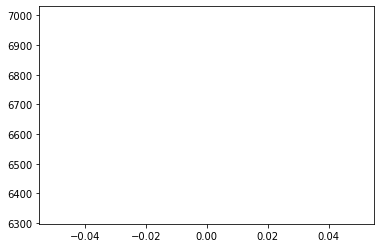

In [106]:
def MSE(fan1,fan2):
  plt.plot(mean_squared_error(fan1,fan2))
  return mean_squared_error(fan1,fan2)
print('Mean Squared Error: ',MSE(arr,arr1))